<font color = green >

## Home Task: Implement K-means algorithm

</font>


<font color = green >

###  Steps of implementatiion

</font>

1) Initialize $K$ centroids 

2) Assign every point to closest centroid 

3) Compute new centroids as means of samples assigned to corresponding centroid

4) Implement cost $J = \frac{1}{m}\underset{i}{\sum}(d^{(i)})^{2}$ where $d^{(i)}$ is distance from sample $x^{(i)}$ to assigned centroid $c^{(i)}$

5) Iterate setps 2,3 till cost is stabile 

6) Select the best clustering (with the least cost) from 100 results computed with random centroid  initializations 

7) Visualize results (clusters, centroids) for $K=4$

Note: 
* You may  need develop couple of additional/intermediate functions
* You may track cost changes to make sure the algorithm is working properly 

1) Initialize $K$ centroids 

In [43]:
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib notebook

<IPython.core.display.Javascript object>


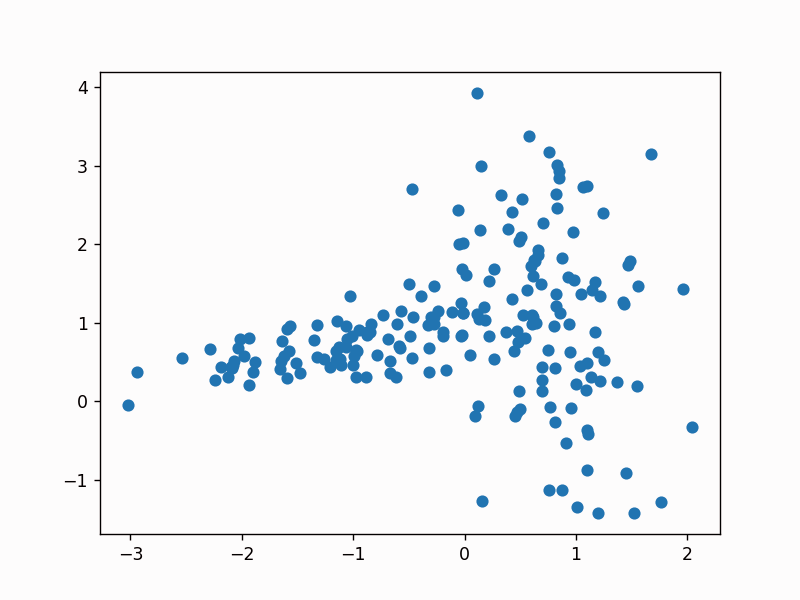

In [44]:
from sklearn.datasets import make_classification
Xc_2,_= make_classification(n_samples=200,
                            n_features=2,
                            n_informative=2,
                            n_redundant=0,
                            random_state=0,
                            n_clusters_per_class=1,
                            class_sep = 0.8)
plt.figure()
plt.scatter  (Xc_2[:,0], Xc_2[:,1])

[[-1  0]
 [ 1 -1]
 [ 1  2]]


<IPython.core.display.Javascript object>


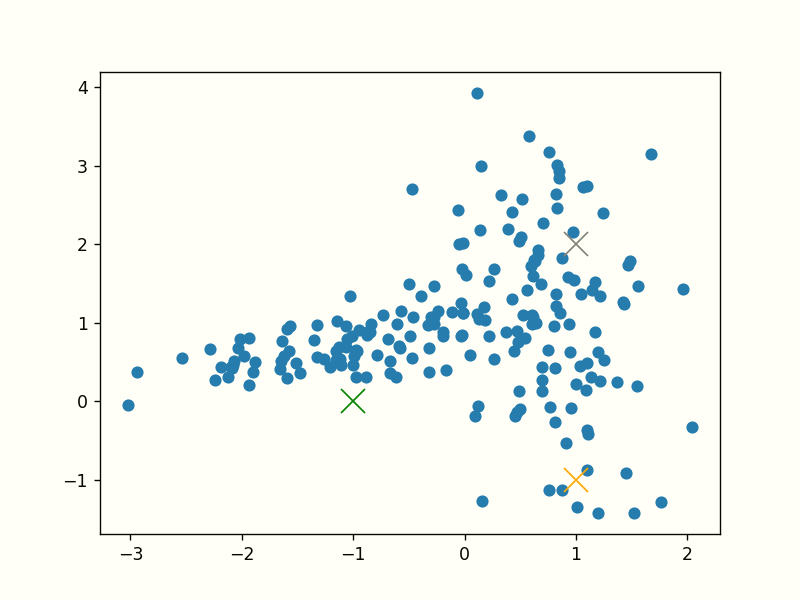

In [45]:
colors = np.array(['green','orange','grey', 'brown'])
def plot_points(closest_centroids = None):
    if closest_centroids is None:
        plt.scatter(Xc_2[:,0], Xc_2[:,1])
    else:
        plt.scatter(Xc_2[:,0], Xc_2[:,1], c=colors[closest_centroids])
        

def init_centroids(amount, is_random = True, points = None, seed = 10): 
    if is_random:
        np.random.seed(seed) 
        return points [np.random.choice(len(points), amount)]        
    else:
        centroids = np.array([(-1, 0), (1, -1), (1, 2)])
        return centroids[:amount]

    
# centroids = init_centroids(2, is_random= False)
centroids = init_centroids(4, is_random= False)
print (centroids)


def plot_centroids(centroids):
    for i, c in enumerate (centroids):
        plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 

        
def draw_state(centroids = None, closest_centroids = None):        
    plt.figure ()
    plot_points(closest_centroids)
    plot_centroids(centroids)

    
draw_state(centroids = centroids, closest_centroids=None)

In [49]:
points = np.array(list((zip(Xc_2[:,0], Xc_2[:,1]))))
points[:5]

array([[ 0.87033369, -1.12915356],
       [-0.27565612,  1.07888341],
       [ 0.68590571,  1.4901946 ],
       [ 1.16581799,  0.87715301],
       [-1.0607126 ,  0.6950888 ]])

In [50]:
def compute_distances(samples, centroids):
    '''
    params:
        samples - array of samples(pairs of coordinates) to compute from each the distance to sentroid e.g. array([[17, 83],[50, 67]])
        centroids - array of centroids coordinates e.g. array([[20, 20],[60, 80],[60, 10]])
    retruns: 2d array of distances from each sample to all centroid - the axis 0-centroids, 1-samples 
    '''    
    return np.array([np.apply_along_axis(np.linalg.norm, 1, samples-c) for c in centroids])

# compute_distances(points[:3], centroids[:1]) # Note: make sue it is array/list of centroids not the single centroid  

compute_distances(points, centroids)

array([[2.18475076, 1.29948585, 2.25010178, 2.33669959, 0.69773524,
        1.23490719, 3.52114003, 0.65202868, 0.61086768, 2.59929927,
        1.57832446, 2.09754416, 3.06801145, 1.49369162, 0.95557207,
        1.44460466, 1.90085419, 2.23216359, 1.16864328, 2.646657  ,
        1.01023714, 2.08645989, 1.54130088, 1.37146174, 2.15101043,
        1.76673972, 0.76684755, 2.61672721, 0.82917341, 2.13396867,
        2.72461989, 0.65899066, 0.90077029, 0.30713149, 1.18771112,
        2.17481279, 2.89633778, 1.18208587, 0.62561212, 3.27747453,
        2.0208812 , 1.19762769, 1.93882341, 3.04391043, 1.20604825,
        0.63817407, 1.16480202, 1.19263533, 2.41849895, 1.96436959,
        1.82652521, 2.3773289 , 3.02264038, 1.00073689, 3.21349138,
        2.72957414, 1.17266354, 1.11528638, 2.10599887, 3.73090124,
        1.49433074, 0.96103119, 1.49707878, 1.34111731, 1.22124488,
        1.38042872, 0.85996275, 2.18986909, 0.81942302, 2.61499318,
        2.1542207 , 1.94985985, 0.7958256 , 2.27

In [51]:
def J(centroids, closest_centroids):
    '''
    params: 
        centroids - list/array of pairs (coordinnates)  of centroids e.g. centroids = [(20,20), (60,80), (60,10)]
        closest_centroids - array of len= m (number of samples) that contains indices of centroids e.g. [1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 2 0 2 1 2 2 2 2 2 2 1 2 1 2 2 2 2
         1 2 2]
    '''
    all_dist = [] 
    for c_index in set(closest_centroids):
        assigned_samples = points[np.where(closest_centroids==c_index)]# select only points assigned to centroid
        all_dist_centroid = compute_distances(assigned_samples, [centroids[c_index]])
        all_dist.append(np.sum(all_dist_centroid))
    m = len(closest_centroids)
    return 1/m* np.sum(all_dist)


closest_centroids= np.zeros(len(points), dtype=int) # compute for case of all samples assigned to first centroid
print ('Cost= {}'.format(J(centroids, closest_centroids)))

Cost= 1.7563019980284253


2) Assign every point to closest centroid 

closest_centroids:
 [1 0 2 2 0 0 2 0 0 2 2 1 2 2 0 0 2 1 0 2 0 1 2 0 1 1 0 1 0 1 2 0 0 0 0 2 1
 0 0 2 0 0 2 1 0 0 0 0 1 2 1 1 2 0 2 2 0 0 2 2 1 0 1 0 0 0 0 2 0 1 1 2 0 1
 0 0 0 2 2 0 1 0 0 0 2 2 0 2 2 2 0 2 2 2 0 1 0 2 2 2 2 0 1 2 0 0 0 0 0 2 0
 2 0 2 0 2 2 2 0 2 2 2 2 0 1 2 0 2 0 0 2 2 0 0 0 1 2 2 2 1 2 0 2 0 2 1 2 0
 2 0 0 1 2 0 2 0 2 0 1 2 2 0 1 0 0 2 1 2 0 0 2 2 2 1 0 0 0 1 0 0 0 2 2 0 2
 2 2 2 0 2 2 2 0 0 2 2 2 1 0 2]
Cost= 0.9548937466625244


<IPython.core.display.Javascript object>


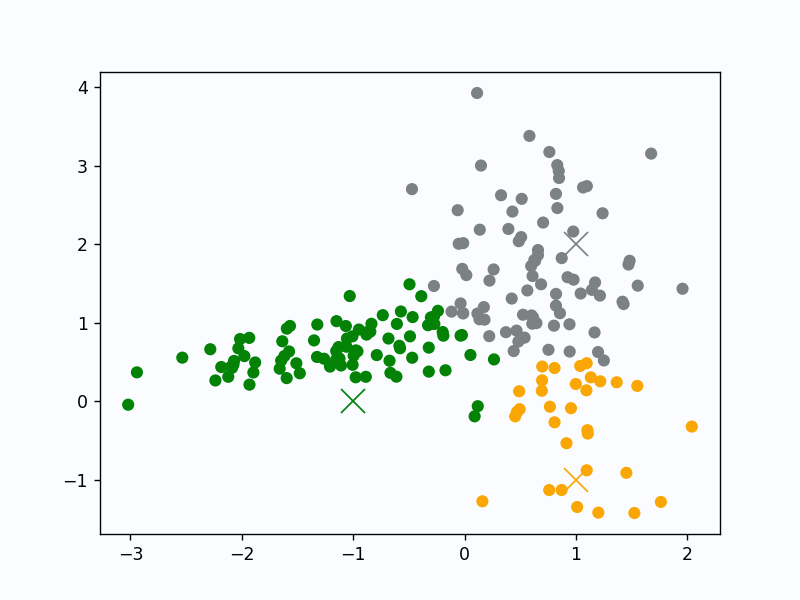

In [52]:
def compute_closest_centroids(centroids):       
    all_distances = compute_distances(points, centroids) #np.array([np.apply_along_axis(np.linalg.norm,1,points-c) for c in centroids])
    closest_centroids = np.apply_along_axis(np.argmin,0,all_distances)
    return closest_centroids

closest_centroids = compute_closest_centroids(centroids) 
print ('closest_centroids:\n',closest_centroids)
print ('Cost= {}'.format(J(centroids, closest_centroids)))
draw_state(centroids = centroids, closest_centroids = closest_centroids)


3) Compute new centroids as means of samples assigned to corresponding centroid

New centroids: [array([-1.10365137,  0.66290722]), array([ 0.99377695, -0.29914716]), array([0.63999061, 1.69032042])]
Cost= 0.7221286493358605


<IPython.core.display.Javascript object>


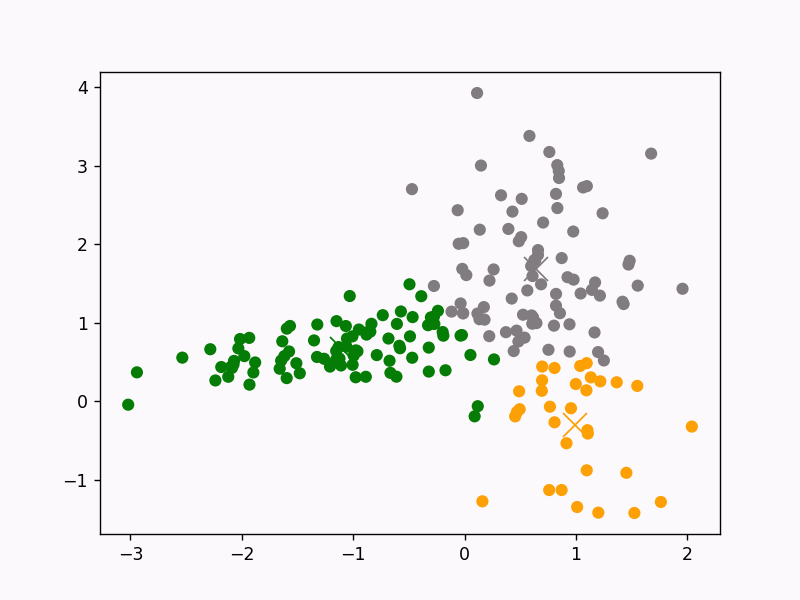

In [53]:
def compute_means(centroids, closest_centroids):     # need to consider all centroids in case of no assigned points to some centroid  
    new_centroids= []
    for i in range (len(centroids)):
        if i not in closest_centroids: # no assigned point assigned to this centroid 
            new_centroids.append(centroids[i])
        else: 
            new_centroid= np.mean(points[np.where(closest_centroids==i)], axis = 0)
            new_centroids.append(new_centroid)
    return new_centroids

centroids = compute_means(centroids, closest_centroids)
print ('New centroids:',centroids)
print ('Cost= {}'.format(J(centroids, closest_centroids)))
draw_state(centroids = centroids, closest_centroids = closest_centroids)

4) Implement cost $J = \frac{1}{m}\underset{i}{\sum}(d^{(i)})^{2}$ where $d^{(i)}$ is distance from sample $x^{(i)}$ to assigned centroid $c^{(i)}$

In [54]:
def J(centroids, closest_centroids):
    '''
    params: 
        centroids - list/array of pairs (coordinnates)  of centroids e.g. centroids = [(20,20), (60,80), (60,10)]
        closest_centroids - array of len= m (number of samples) that contains indices of centroids e.g. [1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 2 0 2 1 2 2 2 2 2 2 1 2 1 2 2 2 2
         1 2 2]
    '''
    all_dist = [] 
    for c_index in set(closest_centroids):
        assigned_samples = points[np.where(closest_centroids==c_index)]# select only points assigned to centroid
        all_dist_centroid = compute_distances(assigned_samples, [centroids[c_index]])
        all_dist.append(np.sum(all_dist_centroid))
    m = len(closest_centroids)
    return 1/m* np.sum(all_dist)


closest_centroids= np.zeros(len(points), dtype=int) # compute for case of all samples assigned to first centroid
print ('Cost= {}'.format(J(centroids, closest_centroids)))

Cost= 1.5436906563791148


5) Iterate setps 2,3 till cost is stabile 

<IPython.core.display.Javascript object>


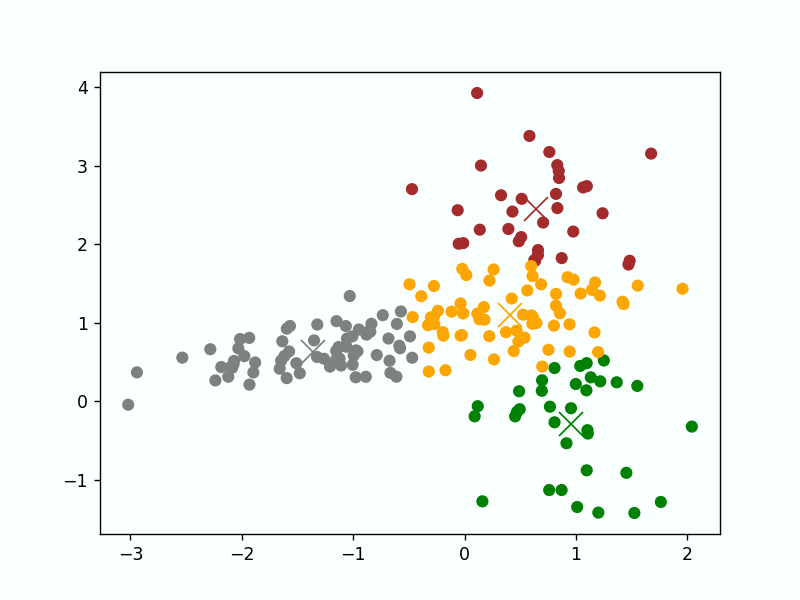

In [55]:
from matplotlib import animation
fig, ax = plt.subplots()


centroids = init_centroids(is_random = False, 
                           amount =4, 
                           points= points,
                           seed = 2)
# closest_centroids= compute_closest_centroids(centroids) 

J_hist = [-1] # init -1 to let compare with first value 

def update(curr):

    ax.clear()

    global closest_centroids
    global centroids
    global J_hist

    ax.scatter(Xc_2[:,0], Xc_2[:,1], c= colors[closest_centroids])
    for i, c in enumerate (centroids):
        ax.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 


    closest_centroids = compute_closest_centroids(centroids) 
    centroids = compute_means(centroids, closest_centroids)
    
    new_J = J(centroids, closest_centroids)
    if J_hist[-1] == new_J:
        a.event_source.stop()
        
    J_hist.append(J(centroids, closest_centroids))
#     ax.plot(np.random.rand(10)) # use to test annimation is working 
    plt.title('Iteration # {}, J= {}'.format(curr, new_J)) # need to add it once more since it disappears with ax.clear()


a = animation.FuncAnimation(fig, update, interval=2000) # Note: you need to assign this in order to run the animation if you believe it necessary 


<IPython.core.display.Javascript object>


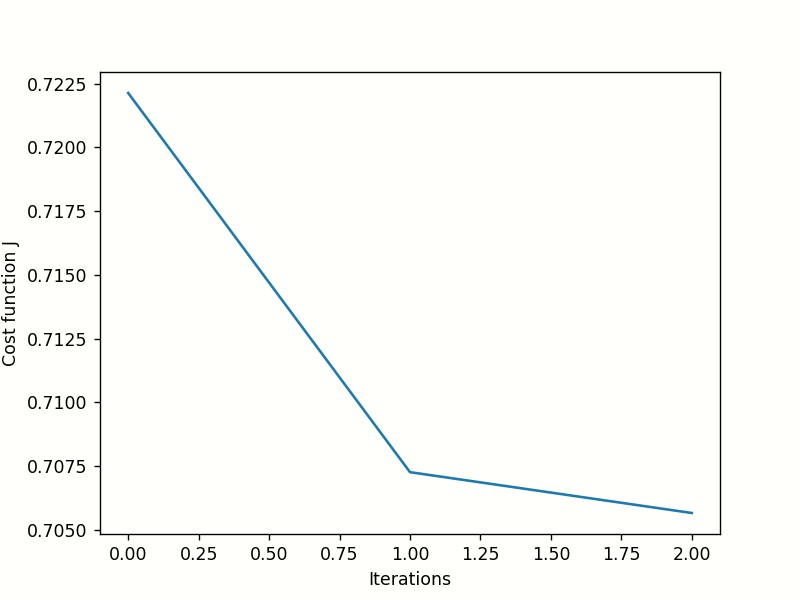

Text(0, 0.5, 'Cost function J')

In [56]:
def run_k_means(centroids):
    is_first_time= True 
    J_hist = []
    is_to_continue = True
    
    while is_to_continue:
        closest_centroids = compute_closest_centroids(centroids) 
        centroids = compute_means( centroids , closest_centroids) 
        new_J = J(centroids, closest_centroids)                
        if is_first_time:
            J_hist.append(J(centroids, closest_centroids))            
            is_first_time= False
            continue
        if J_hist[-1] == new_J:
            is_to_continue= False
        else: 
            J_hist.append(J(centroids, closest_centroids))         

    return centroids, closest_centroids, J_hist

centroids = init_centroids(amount = 3, points= points, is_random=False, seed= None )
centroids, closest_centroids, J_hist = run_k_means(centroids)
plt.figure()
plt.plot(J_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost function J')

6) Select the best clustering (with the least cost) from 100 results computed with random centroid  initializations 

In [57]:
costs = {}
for i in range(1, 10):
    centroids= init_centroids(amount=i, points= points, is_random=True, seed=10)
    centroids, closest_centroids, J_hist = run_k_means(centroids)
    
    costs[i] = J(centroids, closest_centroids)

min_key = min(costs, key=costs.get)
print(min_key, costs[min_key], "\n")
[print(key,':',value) for key, value in costs.items()]


9 0.4062839651150184 

1 : 1.2589242354917562
2 : 0.8832506962044167
3 : 0.705591436078996
4 : 0.6023516496102768
5 : 0.5199632113151746
6 : 0.4601061939718419
7 : 0.43325211734002417
8 : 0.41814992670650003
9 : 0.4062839651150184


[None, None, None, None, None, None, None, None, None]

7) Visualize results (clusters, centroids) for $K=4$

<IPython.core.display.Javascript object>


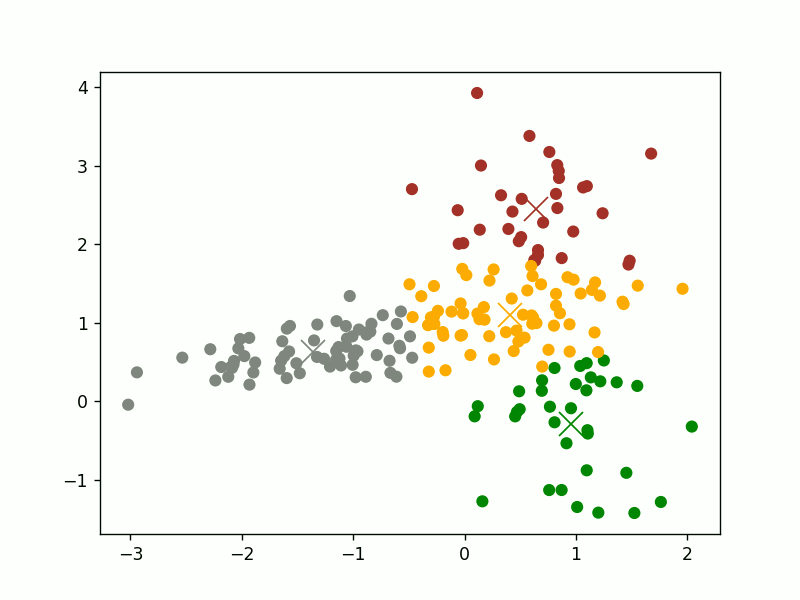

<IPython.core.display.Javascript object>


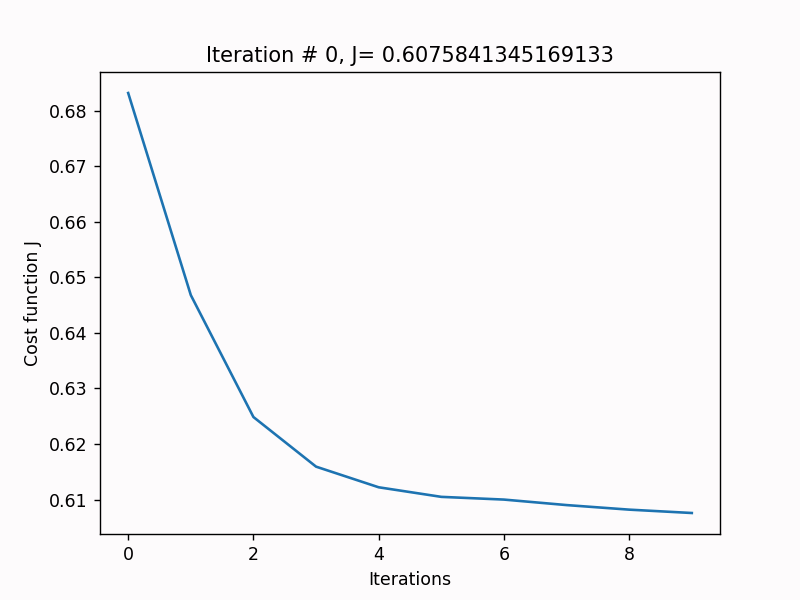

Text(0, 0.5, 'Cost function J')

In [58]:
centroids = init_centroids(amount = 4, points= points, is_random=True, seed= None )
centroids, closest_centroids, J_hist = run_k_means(centroids)

draw_state(centroids = centroids, closest_centroids = closest_centroids)

plt.figure()
plt.plot(J_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost function J')